In [33]:
import pysewer 
import networkx as nx 
import matplotlib.pyplot as plt
from pysewer.config.settings import load_config, view_default_settings, config_to_dataframe

from matplotlib.dates import DateFormatter

myfmt = DateFormatter('%m.%y')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial','Tahoma', 'DejaVu Sans', 'Lucida Grande', 'Verdana']
plt.rcParams['font.size'] = 15
plt.rcParams['axes.labelsize'] = 17
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 17
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 13
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['xtick.major.pad'] = 5  # distance to major tick label in points



In [34]:
# show the default congifuration
# here you can see that the input data is missing. You can either create a config file to add them or add them manually.
view_default_settings()





,Setting,Value
0,preprocessing_dem_file_path,None
1,preprocessing_roads_input_data,None
2,preprocessing_buildings_input_data,None
3,preprocessing_dx,10
4,preprocessing_pump_penalty,1000
5,preprocessing_max_connection_length,30
6,preprocessing_clustering,centers
7,preprocessing_connect_buildings,True
8,preprocessing_add_private_sewer,True
9,preprocessing_field_get_sinks,node_type


In [35]:
# load custom settings from the example settings file
custom_config = load_config("./test_data_settings.yaml")
df_config = config_to_dataframe(custom_config)
display(df_config)


,Setting,Value
0,preprocessing_dem_file_path,../tests/test_data/dem.tif
1,preprocessing_roads_input_data,../tests/test_data/roads_clipped.shp
2,preprocessing_buildings_input_data,../tests/test_data/buildings_clipped.shp
3,preprocessing_dx,10
4,preprocessing_pump_penalty,1000
5,preprocessing_max_connection_length,30
6,preprocessing_clustering,centers
7,preprocessing_connect_buildings,True
8,preprocessing_add_private_sewer,True
9,preprocessing_field_get_sinks,node_type


In [36]:
# Instantiate the model domain
test_model_domain = pysewer.ModelDomain(
    dem=custom_config.preprocessing.dem_file_path,
    buildings=custom_config.preprocessing.buildings_input_data,
    roads=custom_config.preprocessing.roads_input_data,
    clustering=custom_config.preprocessing.clustering,
)

/Users/despot/miniconda3/envs/pysewer/lib/python3.10/site-packages/shapely/linear.py:208: RuntimeWarning: invalid value encountered in shortest_line
  return lib.shortest_line(a, b, **kwargs)
/Users/despot/miniconda3/envs/pysewer/lib/python3.10/site-packages/shapely/linear.py:208: RuntimeWarning: invalid value encountered in shortest_line
  return lib.shortest_line(a, b, **kwargs)
/Users/despot/miniconda3/envs/pysewer/lib/python3.10/site-packages/shapely/linear.py:208: RuntimeWarning: invalid value encountered in shortest_line
  return lib.shortest_line(a, b, **kwargs)
/Users/despot/miniconda3/envs/pysewer/lib/python3.10/site-packages/shapely/linear.py:208: RuntimeWarning: invalid value encountered in shortest_line
  return lib.shortest_line(a, b, **kwargs)
/Users/despot/miniconda3/envs/pysewer/lib/python3.10/site-packages/shapely/linear.py:208: RuntimeWarning: invalid value encountered in shortest_line
  return lib.shortest_line(a, b, **kwargs)
/Users/despot/miniconda3/envs/pysewer/li

In [37]:
test_model_domain.add_sink((691350, 2553250))

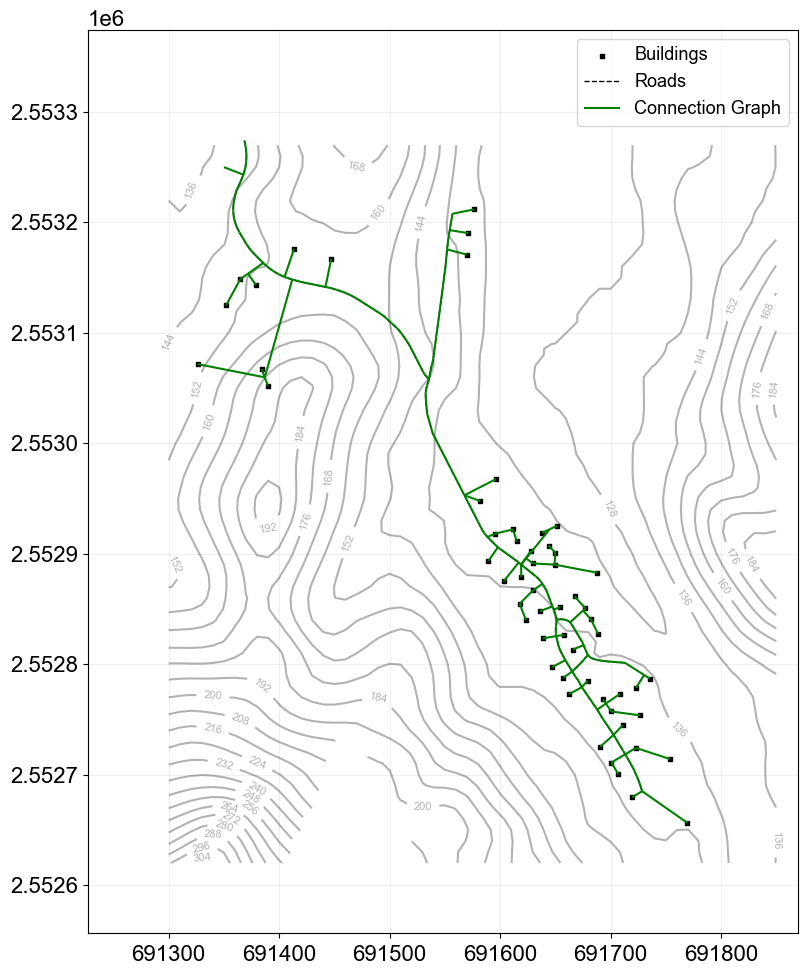

In [38]:
import earthpy.plot as ep
import earthpy.spatial as es
import rasterio
import numpy as np
from rasterio.plot import plotting_extent

hs_alt=30
hs_az=0

fig, ax = pysewer.plot_model_domain(
    test_model_domain,
    plot_connection_graph=custom_config.plotting.plot_connection_graph,
    hillshade=False,
    fig_size=(10, 10),
)

rasterio.plot.show(
            test_model_domain.dem.raster,
            contour=True,
            colors="black",
            ax=ax,
            levels=30,
            alpha=0.3,
        )
# rasterio.plot.show(test_model_domain.dem.raster, ax=ax, cmap="pink")
# # Create and plot the hillshade with earthpy
# elevation = test_model_domain.dem.raster.read(1)
# # Set masked values to np.nan
# elevation = elevation.astype(np.float32)
# elevation[elevation < 0] = 0

# print(f"Min: {np.min(elevation)}, Max: {np.max(elevation)}")
# hillshade = es.hillshade(elevation, altitude=hs_alt, azimuth=hs_az)

# ep.plot_bands(
#             hillshade,
#             ax=ax,
#             extent=plotting_extent(test_model_domain.dem.raster),
#             cbar=True,
#             title="Hillshade made from DTM",
#             cmap="pink",
#             alpha=0.8,
#             scale=True
# )
# ax.set_title("Topographic Map with Connection Graph")
ax.set_title("")
ax.grid(alpha=0.2)
fig.tight_layout()
fig.savefig("../data/figures/test_dem_elevation.svg", transparent=True, bbox_inches="tight")


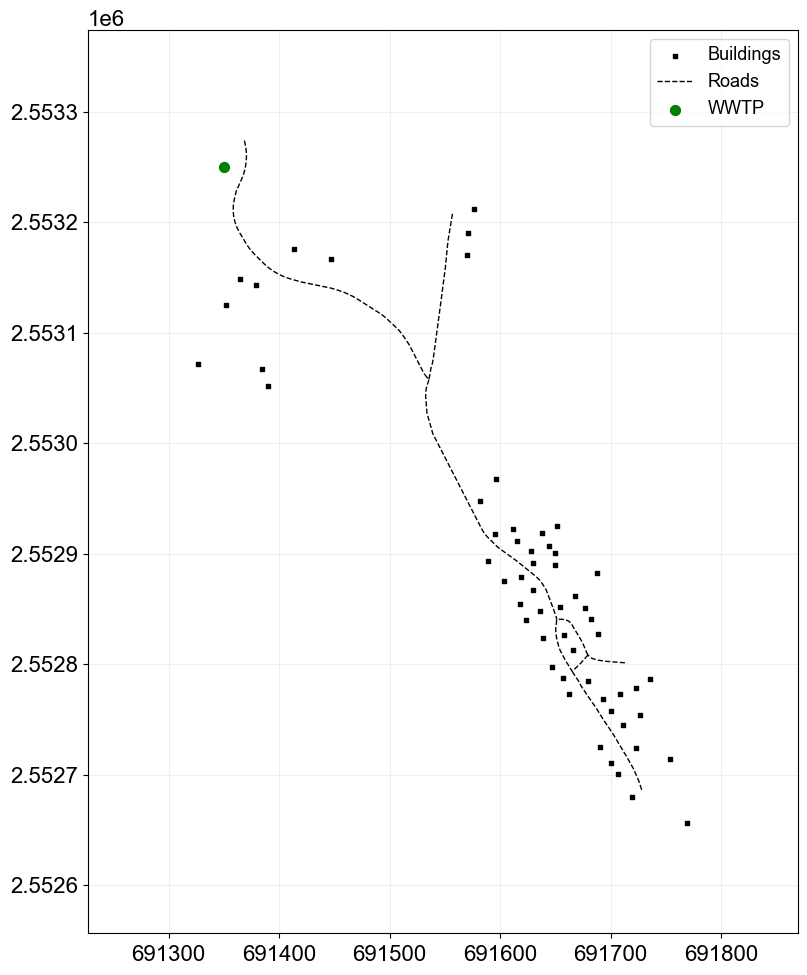

In [39]:
fig, ax = pysewer.plot_model_domain(
    test_model_domain, plot_sink=custom_config.plotting.plot_sink, fig_size=(10, 10)
)
ax.set_title("")
ax.grid(alpha=0.2)
fig.tight_layout()
fig.savefig("../data/figures/test_infrastructure.svg", transparent=True, bbox_inches="tight")

In [40]:
# create the the graph conections
# this to be used for the routing algorithm
connection_graph = test_model_domain.generate_connection_graph()

200
98
Simplified graph: 200 to 97 nodes, 232 to 129 edges


In [41]:
test_model_domain.get_sinks()

[(691350.0, 2553250.0)]

In [42]:
layout = pysewer.rsph_tree(connection_graph, test_model_domain.get_sinks(), "building")

In [43]:
test_model_domain.add_sink((691350, 2553250))

No pumping station in the sewer graph
Plotting sewer graph without pumping station


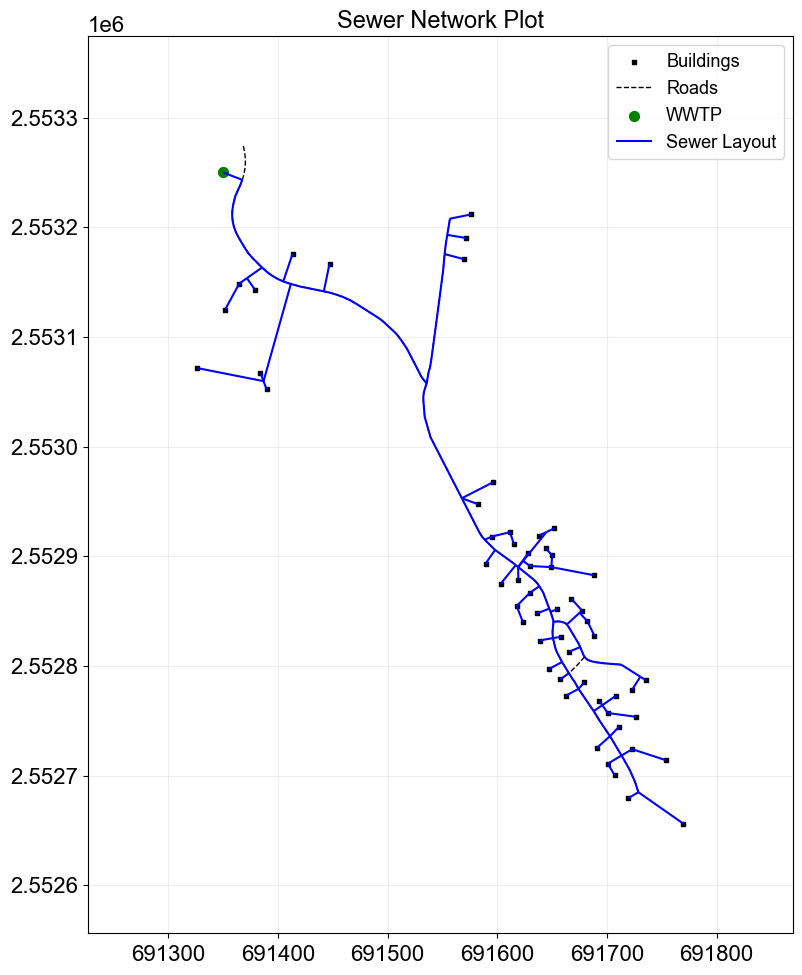

In [44]:
fig, ax = pysewer.plot_model_domain(
    test_model_domain, plot_sewer=True, sewer_graph=layout, plot_sink=True, fig_size=(10, 10)
)
ax.grid(alpha=0.2)
fig.tight_layout()
fig.savefig("../data/figures/test_sewer_network.svg", transparent=True, bbox_inches="tight")
plt.show()

0


/Users/despot/miniconda3/envs/pysewer/lib/python3.10/site-packages/geopandas/plotting.py:678: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


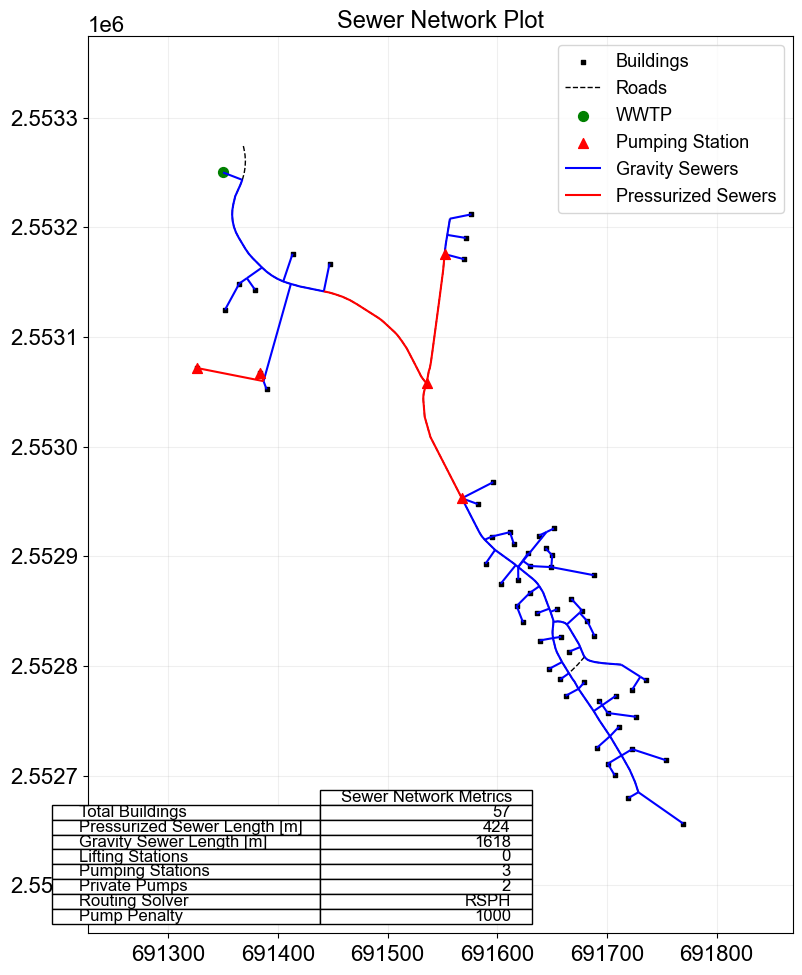

In [45]:
G = pysewer.estimate_peakflow(
    layout,
    inhabitants_dwelling=custom_config.optimization.inhabitants_dwelling,
    daily_wastewater_person=custom_config.optimization.daily_wastewater_person,
)
G = pysewer.calculate_hydraulic_parameters(
    layout,
    sinks=test_model_domain.get_sinks(),
    diameters=custom_config.optimization.diameters,
    pressurized_diameter=custom_config.optimization.pressurized_diameter,
    include_private_sewer=True,
    roughness=custom_config.optimization.roughness,
)
info = pysewer.get_sewer_info(G)
info["Routing Solver"] = "RSPH"
info["Pump Penalty"] = test_model_domain.pump_penalty
fig, ax = pysewer.plot_model_domain(
    test_model_domain, plot_sewer=True, sewer_graph=G, info_table=info, plot_sink=True, fig_size=(10, 10)
)

ax.set_title("Sewer Network Plot")
plt.legend(loc="upper right")
ax.grid(alpha=0.2)
fig.tight_layout()
fig.savefig("../data/figures/test_optimized_sewer_network.svg", transparent=True, bbox_inches="tight")
plt.show()

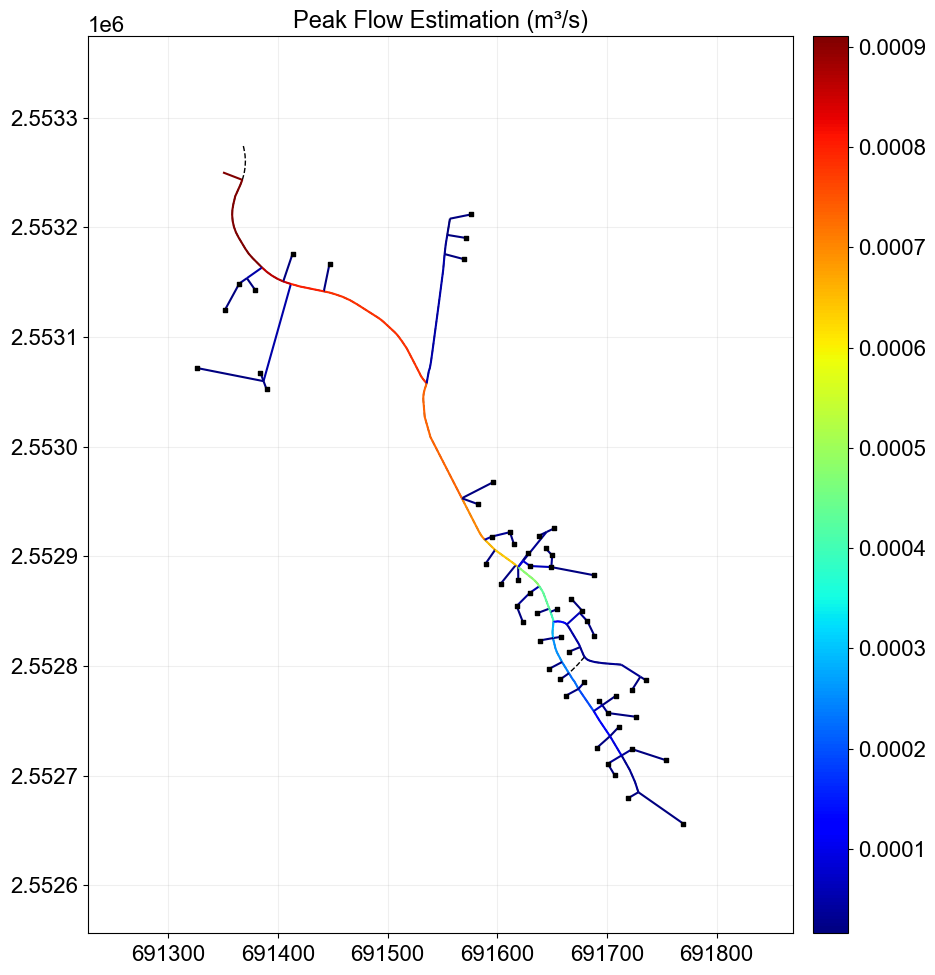

In [46]:
fig, ax  = pysewer.plot_sewer_attributes(
    test_model_domain, G, attribute="peak_flow", title="Peak Flow Estimation (m³/s)", fig_size=(10, 10)
)
ax.grid(alpha=0.2)
fig.tight_layout()
fig.savefig("../data/figures/test_peak_flow_estimation.svg", transparent=True, bbox_inches="tight")
plt.show()

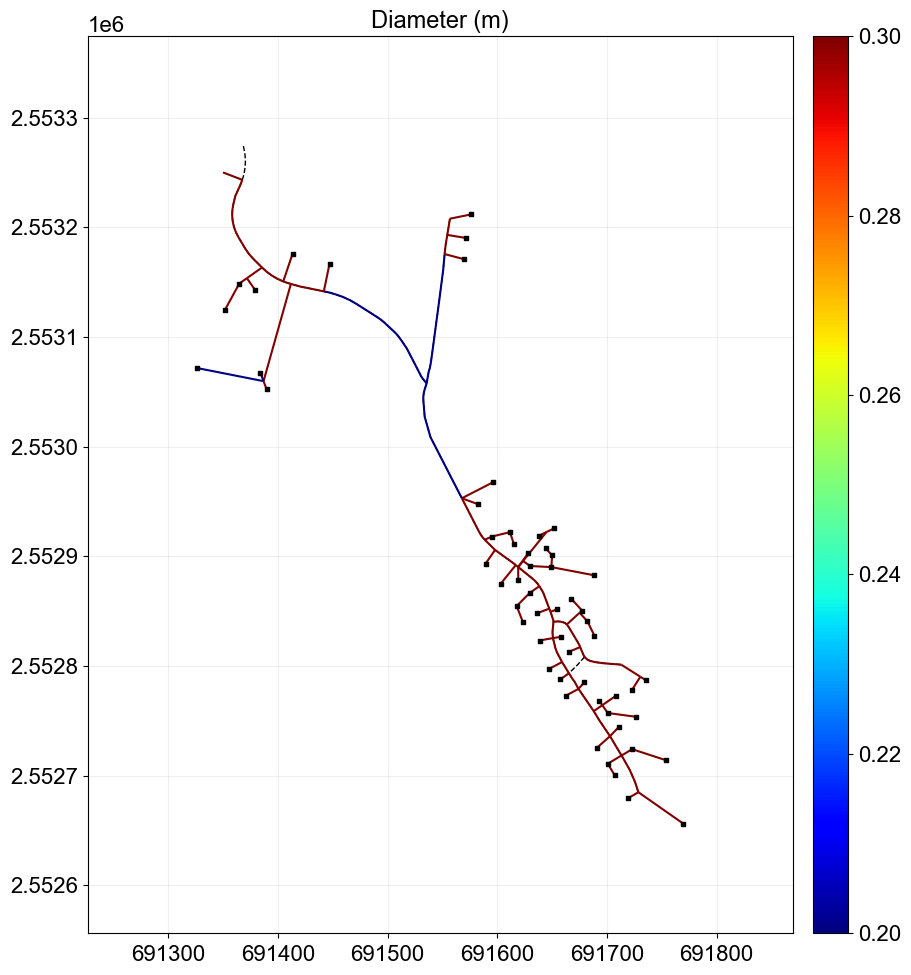

In [47]:
fig, ax = pysewer.plot_sewer_attributes(
    test_model_domain, G, attribute="diameter", title="Diameter (m)", fig_size=(10, 10)
)
ax.grid(alpha=0.2)
fig.tight_layout()
fig.savefig("../data/figures/test_diameter.svg", transparent=True, bbox_inches="tight")
plt.show()